In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import scipy


PyPop7: A Pure-Python Library for POPulation-based Black-Box Optimization (BBO)

Documentation
[https://pypop.readthedocs.io/en/latest/](https://pypop.readthedocs.io/en/latest/)

Repository
[https://github.com/Evolutionary-Intelligence/pypop](https://github.com/Evolutionary-Intelligence/pypop)

 Install using:
 `pip install pypop7`

In [15]:
# Success-History based Adaptive Differential Evolution (SHADE).
from pypop7.optimizers.de import SHADE

In [16]:
# project files
import sys; sys.path.insert(0, '..')

from utils.variables import pack, unpack
from utils.display import table, tabulate, list_members
from utils.files import download_sheet, save, load
from utils.hash import digest

from model.fit_options import fit_options, RoundApprox
from model.rp import compute_rp, make_precomputed_columns
from model.initial_guess import make_initial_guess

In [17]:
# stuff for display

from IPython.lib.pretty import pretty, pprint

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 120)

In [18]:
data = pd.read_pickle(fit_options.data_file)
data.describe()
data.head()

,Level,RP,MS lvl,ModelRP,Difference,Freq1,FreqL,Inv,Berry1,BerryL,Ing1P,Helps per hour,Helps Neutral,NrgMult,IngrMult,SkillMult,Ingr%,SklContr,BerryD,IngD,Dupes,Amnt,Ing2P,Help skill bonus,RP Multiplier
count,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.0,7394.000000,7394.000000,7394.000000,7394.000000
mean,11.159183,633.553827,1.531106,631.221396,-0.002029,3910.792534,3754.827046,12.358128,28.068434,38.351636,108.905058,1.035135,0.988096,0.994601,0.998999,1.007276,0.206731,34.558823,56.060319,148.205504,1.0,0.086827,3.585475,0.986585,1.030131
std,7.404413,413.293029,1.021303,413.930272,0.580695,973.915081,1037.172015,3.479251,2.616819,8.314996,16.191425,0.310743,0.058787,0.044944,0.117892,0.118634,0.045978,38.524205,28.135215,61.483427,0.0,0.557071,22.268253,0.039022,0.072489
min,1.000000,245.000000,1.000000,-1.000000,-21.000000,2200.000000,1489.118400,7.000000,24.000000,24.000000,90.000000,0.520000,0.890000,0.920000,0.800000,0.800000,0.000000,0.000000,25.000000,90.000000,1.0,0.000000,0.000000,0.790000,1.000000
25%,5.000000,361.000000,1.000000,360.000000,0.000000,3100.000000,2910.000000,10.000000,26.000000,33.000000,98.000000,0.810000,1.000000,1.000000,1.000000,1.000000,0.180000,13.160000,36.000000,101.000000,1.0,0.000000,0.000000,1.000000,1.000000
50%,10.000000,489.000000,1.000000,487.000000,0.000000,3800.000000,3731.600000,12.000000,28.000000,37.000000,103.000000,0.960000,1.000000,1.000000,1.000000,1.000000,0.200000,20.200000,46.000000,121.000000,1.0,0.000000,0.000000,1.000000,1.000000
75%,14.000000,746.000000,2.000000,743.000000,0.000000,4500.000000,4419.000000,14.000000,31.000000,42.000000,115.000000,1.230000,1.000000,1.000000,1.000000,1.000000,0.230000,47.682500,68.000000,202.000000,1.0,0.000000,0.000000,1.000000,1.000000
max,42.000000,3493.000000,6.000000,3495.000000,5.000000,6300.000000,6916.140000,24.000000,35.000000,83.000000,151.000000,2.410000,1.120000,1.080000,1.200000,1.200000,0.420000,414.090000,243.000000,511.000000,1.0,8.000000,342.000000,1.000000,1.440000


,Pokemon,Level,RP,Nature,MS lvl,Source,ModelRP,Difference,Nature2,ID,NatureP,NatureN,Freq1,FreqL,Type,Class,MSkill,Inv,Berry1,BerryL,Ing1,Ing1P,Helps per hour,Helps Neutral,NrgMult,IngrMult,SkillMult,Ingr%,SklContr,RPneutral,IDNeutral,BerryD,IngD,Dupes,DupeMatch,Sub Skill 1,Sub Skill 2,Ingredient 2,Amnt,Ing2P,Help skill bonus,RP Multiplier
0,Arbok,9.0,574.0,Naughty,1.0,Rate My Mon,574.0,0.0,Naughty,ArbokNaughty91,Speed of Help,Main Skill Chance,3700.0,3276.72,Poison,Berries,Charge Energy S,14.0,32.0,40,Bean Sausage,103.0,1.09,0.9,1.00,1.0,0.8,0.26,22.75,538.35,ArbokNeutral91,80.0,103.0,1,True,,,,0.0,0.0,1.0,1.0
1,Arbok,8.0,531.0,Hardy,1.0,Questions help guides,531.0,0.0,Neutral,ArbokNeutral81,-,-,3700.0,3648.20,Poison,Berries,Charge Energy S,14.0,32.0,39,Bean Sausage,103.0,0.98,1.0,1.00,1.0,1.0,0.26,22.75,531.00,ArbokNeutral81,78.0,103.0,1,True,,,,0.0,0.0,1.0,1.0
2,Arbok,8.0,538.0,Quiet,1.0,Questions help guides,538.0,0.0,Quiet,ArbokQuiet81,Ingredient Finding,Exp Gains,3700.0,3648.20,Poison,Berries,Charge Energy S,14.0,32.0,39,Bean Sausage,103.0,0.98,1.0,1.00,1.2,1.0,0.26,22.75,530.60,ArbokNeutral81,78.0,103.0,1,True,,,,0.0,0.0,1.0,1.0
3,Arbok,9.0,582.0,Relaxed,1.0,,582.0,0.0,Relaxed,ArbokRelaxed91,Energy Recovery,EXP Gains,3700.0,3640.80,Poison,Berries,Charge Energy S,14.0,32.0,40,Bean Sausage,103.0,0.98,1.0,1.08,1.0,1.0,0.26,22.75,538.89,ArbokNeutral91,80.0,103.0,1,True,,,,0.0,0.0,1.0,1.0
4,Arbok,9.0,489.0,Timid,1.0,,489.0,0.0,Timid,ArbokTimid91,EXP Gains,Speed of Help,3700.0,4004.88,Poison,Berries,Charge Energy S,14.0,32.0,40,Bean Sausage,103.0,0.89,1.1,1.00,1.0,1.0,0.26,22.75,538.45,ArbokNeutral91,80.0,103.0,1,True,,,,0.0,0.0,1.0,1.0


In [19]:
# Make an initial guess
# Pack the dictionary into a 1-D vector.
# Also store information on how to unpack that vector

x0, unpack_info = pack(*make_initial_guess())
computed = make_precomputed_columns(data)

In [20]:
# We compute the RP model in rp_model.py
# Here we create closure to glue the pieces together.

def RP(x):
    return compute_rp(x, data, computed, unpack_info)

# for the error analysis page,
# we'll compute the residual with exact rounding.

def residual(x):
    return data["RP"] - np.round(RP(x))

def sum_squares(x, **kwargs):
    r = residual(x)
    return np.dot(r,r)


In [21]:
filename = fit_options.result_file(digest(data, x0))
opt = load(filename)
opt

    message: `ftol` termination condition is satisfied.
    success: True
     status: 2
          x: [ 2.563e-01  2.544e-01 ...  2.210e-01  2.211e-01]
       cost: 1160.2490719227876
       grad: [-2.782e-05 -5.842e-06 ...  0.000e+00  0.000e+00]
 optimality: 0.43414554256014526
       nfev: 19
       njev: 7

In [23]:
inject_x0 = False,

# For this library, those are more a sampling region than real constraints
# Init between 0.5x and 1.5x. But swap bound if value is negative

optx = opt.x
choice_list = [0.5*optx, 1.5*optx]
bounds_low =  np.select([optx>=0, optx<0], choice_list)
bounds_high = np.select([optx<0, optx>=0], choice_list)

problem = dict(fitness_function=sum_squares, ndim_problem=len(optx), upper_boundary=bounds_high, lower_boundary=bounds_low )
options =dict(max_function_evaluations=10000)

if not inject_x0:
    algo = SHADE(problem, options)

else:

    class ShadeCustom(SHADE):
        def initialize(self, args=None):
            x, y, a = SHADE.initialize(self, args)

            if(args is not None and 'x0' in args):
                x[0] = args['x0']
                y[0] = self._evaluate_fitness(x[0], args)

            return (x,y,a)

    algo = ShadeCustom(problem, options)

result_de = algo.optimize(fitness_function=None, args={"x0":optx})

  * Generation 0: best_so_far_y 2.26000e+03, min(y) 2.26000e+03 & Evaluations 101
  * Generation 10: best_so_far_y 2.26000e+03, min(y) 2.26000e+03 & Evaluations 1101
  * Generation 20: best_so_far_y 2.26000e+03, min(y) 2.26000e+03 & Evaluations 2101
  * Generation 30: best_so_far_y 2.26000e+03, min(y) 2.26000e+03 & Evaluations 3101
  * Generation 40: best_so_far_y 2.26000e+03, min(y) 2.26000e+03 & Evaluations 4101
  * Generation 50: best_so_far_y 2.26000e+03, min(y) 2.26000e+03 & Evaluations 5101
  * Generation 60: best_so_far_y 2.26000e+03, min(y) 2.26000e+03 & Evaluations 6101
  * Generation 70: best_so_far_y 2.26000e+03, min(y) 2.26000e+03 & Evaluations 7101
  * Generation 80: best_so_far_y 2.26000e+03, min(y) 2.26000e+03 & Evaluations 8101
  * Generation 90: best_so_far_y 2.26000e+03, min(y) 2.26000e+03 & Evaluations 9101
  * Generation 99: best_so_far_y 2.26000e+03, min(y) 2.26000e+03 & Evaluations 10000


In [24]:
table(result_de)

best_so_far_x,[0.25634849 0.25441696 0.2655307 ... 0.18239409 0.22095965 0.22114685]
best_so_far_y,2260.0
n_function_evaluations,10000
runtime,51.56517958641052
termination_signal,Terminations.MAX_FUNCTION_EVALUATIONS
time_function_evaluations,48.31521534919739
fitness,None
success,True
_n_generations,99


count    7394.000000
mean       -0.001893
std         0.552893
min        -5.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        15.000000
Name: RP, dtype: float64

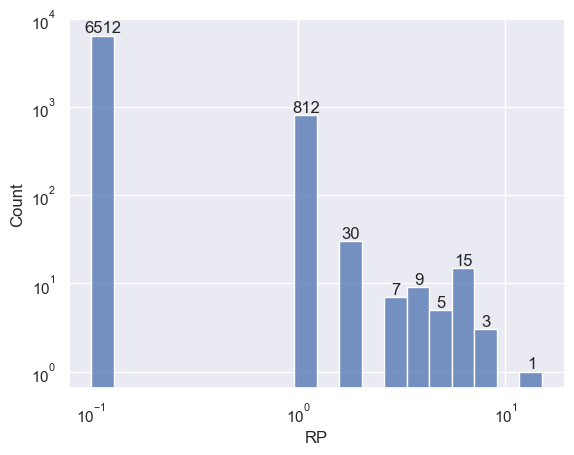

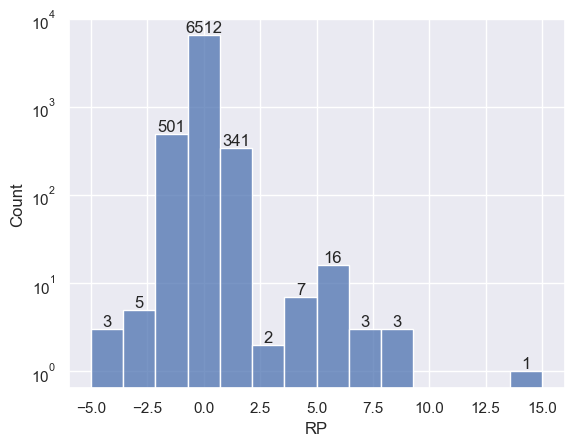

In [25]:
r_opt = data["RP"] - np.round(RP(result_de['best_so_far_x']))
pd.Series(r_opt).describe()

_ = plt.figure()
g = sns.histplot(x=np.clip(np.abs(r_opt), 1e-1,1e3), log_scale=True, bins=20)
g.axes.set_yscale('log')
_ = g.bar_label(g.containers[1], labels= [str(v) if v else '' for v in g.containers[1].datavalues])

_ = plt.figure()
g = sns.histplot(x=r_opt)
_ = g.axes.set_yscale('log')
_ = g.bar_label(g.containers[1], labels= [str(v) if v else '' for v in g.containers[1].datavalues])

In [26]:
sol = unpack(opt.x, unpack_info)
table(sol)

Pokemons ing fractions,[0.25634849 0.25441696 0.2655307 ... 0.18027542 0.20047792 0.21577715]
Pokemons skill products,[16.70524122 16.7115917 18.48051574 ... 44.68492948 12.80026185 15.5216694 ]
Charge Strength S,[0.74637032 0.32257147]
Charge Strength M,[0.7453716 0.32266696]
Ingredient Magnet S,[0.74565496 0.32256509]
Cooking Power-Up S,[0.74459057 0.32310732]
Extra Helpful S,[0.74589711 0.32236621]
Charge Energy S,[0.74829267 0.32200056]
Energizing Cheer S,[0.74664173 0.32196704]
Energy for Everyone S,[0.74568902 0.32280206]
Dream Shard Magnet S,[0.74538695 0.32239043]
